In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

[2017-09-18 23:23:18,917] Making new env: FrozenLake-v0


In [3]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [4]:
print "Number of actions : {}".format(env.action_space.n)
print "Number of observable states : {}".format(env.observation_space.n)

Number of actions : 4
Number of observable states : 16


In [5]:
Q_table = np.zeros((env.observation_space.n, env.action_space.n))

In [6]:
print Q_table

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [7]:
n_episodes = 2000
lr = 0.8
gamma = 0.95
rList = []
sList = []

In [8]:
for i in range(n_episodes):
    s = env.reset()
    tot_reward = 0
    done = False
    for step in range(100):
        a = np.argmax(Q_table[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        next_state, reward, done, _ = env.step(a)
        Q_table[s,a] = (1-lr)*Q_table[s,a] + lr * (reward + gamma * np.max(Q_table[next_state,:]))
        tot_reward += reward
        s = next_state
        if done == True:
            break
    rList.append(tot_reward)
    sList.append(step+1)

In [9]:
def plot_list(arr, y_label, interval=100):
    plot_values = []
    for i in range(0,len(arr)-interval,interval):
        plot_values.append(sum(arr[i:i+100])/100)
    plt.plot(plot_values)
    plt.ylabel(y_label)
    plt.xlabel("Time")
    plt.show()

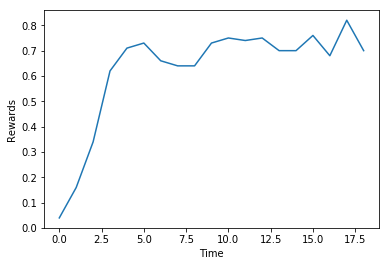

In [10]:
plot_list(rList, "Rewards")

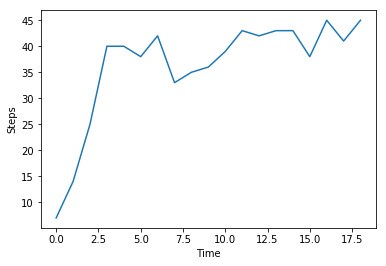

In [11]:
plot_list(sList, "Steps")

In [12]:
print Q_table

[[  4.20937266e-01   4.19481282e-03   1.02812797e-02   1.03687297e-02]
 [  1.33470036e-03   6.20644167e-04   2.54323846e-04   2.02890231e-01]
 [  1.23764231e-01   1.85260230e-03   6.76003729e-03   4.53189618e-03]
 [  3.86693955e-04   4.21198539e-04   8.59172994e-04   6.54454630e-03]
 [  5.45833401e-01   1.40487826e-03   6.33003494e-04   5.24778045e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.92473422e-04   4.09887374e-05   3.49255791e-02   1.36737091e-08]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.45440495e-04   1.29759319e-03   2.73178654e-03   6.68446530e-01]
 [  2.12194889e-03   7.17999694e-01   6.76014262e-04   0.00000000e+00]
 [  9.39134147e-01   1.90769551e-03   7.85637763e-04   1.05394145e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   8.30845474e-01   0.00000000e+00]
 [  0.